In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/zalig/cu-datasets/main/ark.csv'
df = pd.read_csv(url)

# Blue_1
## Метод получения выборки «простая случайная выборка»

Простая случайная выборка (X₁, X₂, ..., Xₙ) получается следующим образом:
1. Из генеральной совокупности строим все возможные выборки размера n без возвращения
2. Выбираем одну из этих выборок равновероятно

В pandas этот метод реализован в функции:
```python
df.sample(n=size)  # без возвращения (по умолчанию)
# или
df.sample(n=size, replace=False)  # явное указание
```

0       0.1650
1       0.1425
2       0.1775
3       0.1500
4       0.1775
         ...  
9995    0.1875
9996    0.1750
9997    0.1725
9998    0.1400
9999    0.1900
Length: 10000, dtype: float64
0.168175


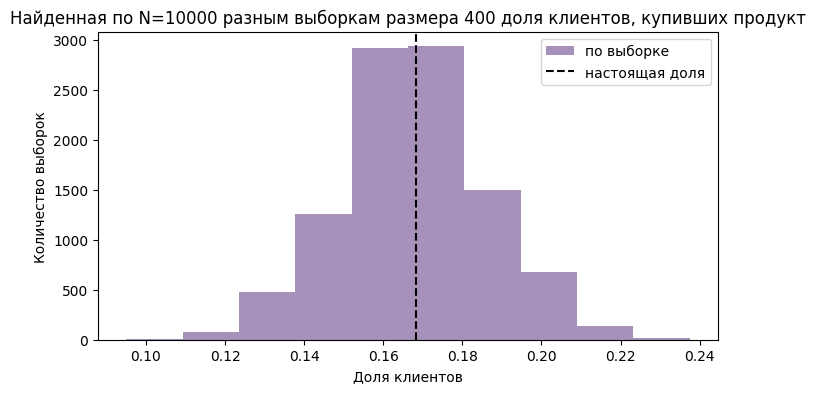

In [ ]:
#Blue_2
population_size = 80000
sample_size = 400
N = 10000
proportions = []
for i in range(N):
  sample = df.sample(n = sample_size)
  proportion_purchasers = (sample['Purchased'] == 'Yes').mean()
  proportions.append(proportion_purchasers)
proportions = pd.Series(proportions)
print(proportions)

true_proportion = (df['Purchased'] == 'Yes').mean()
print(true_proportion)

plt.figure(figsize=(8, 4))
plt.title('Найденная по N=10000 разным выборкам размера 400 доля клиентов, купивших продукт')
plt.ylabel("Количество выборок")
plt.xlabel("Доля клиентов")
plt.hist(proportions, bins=10, color='#a591ba', label='по выборке')
plt.axvline(x=true_proportion, color='black', linestyle='dashed', linewidth=1.5, label='настоящая доля')
plt.legend()
plt.show()

In [ ]:
print("Средняя доля по выборкам:", proportions.mean())
print("Истинная доля:", true_proportion)
# можно заметить легкое смещение гистограммы, но среднее значение выборок очень близко к истинной доле. то есть нет систематичекого завышения/занижения

Средняя доля по выборкам: 0.16843724999999998
Истинная доля: 0.168175


> *может ли метод простой случайной
выборки давать большую ошибку, и если может, то насколько часто?*

##### Да, может давать большую ошибку, особенно когда объем выборки невелик. Также не гарантируется сохранеине структуры по важным признакам. Однако при достаточном количестве повторов и разумном размере выборки, как в данном случае, большие ошибки случаются редко.

---



Доля женщин: 0.4783 Доля мужчин: 0.5217


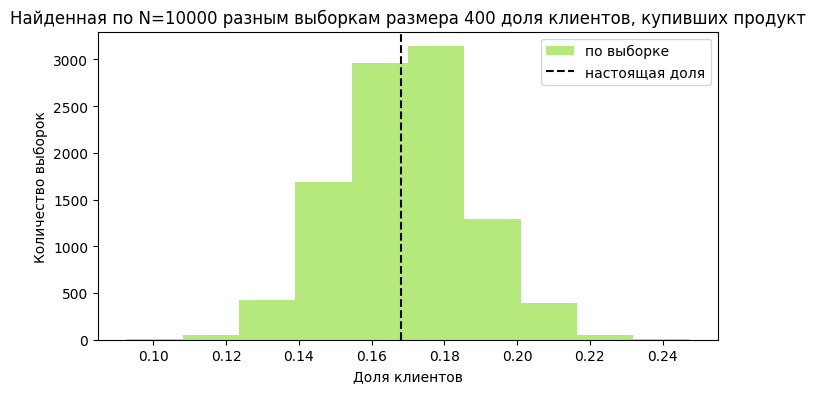

In [ ]:
#Red
stratum_women = sum(df['Gender'] == 'Female')/len(df)
stratum_men = sum(df['Gender'] == 'Male')/len(df)
print(f"Доля женщин: {stratum_women} Доля мужчин: {stratum_men}")

stratified_samples = []
df_women = df[df['Gender'] == 'Female']
df_men = df[df['Gender'] == 'Male']

for i in range(N):
  n_women = int(sample_size * stratum_women)  # кол-во женщин в выборке
  n_men = sample_size - n_women
  sample_w = df_women.sample(n = n_women) # случайная выборка женщин
  sample_m = df_men.sample(n = n_men)
  stratified_sample = pd.concat([sample_w, sample_m]) # объединение двух выборок
  stratified_samples.append((stratified_sample['Purchased'] == 'Yes').mean()) # добавляет новую расчитанную долю для данной выборки
stratified_samples = pd.Series(stratified_samples)

plt.figure(figsize=(8, 4))
plt.title('Найденная по N=10000 разным выборкам размера 400 доля клиентов, купивших продукт')
plt.ylabel("Количество выборок")
plt.xlabel("Доля клиентов")
plt.hist(stratified_samples, bins=10, color='#b6e97c', label='по выборке')
plt.axvline(x=true_proportion, color='black', linestyle='dashed', linewidth=1.5, label='настоящая доля')
plt.legend()
plt.show()



In [ ]:
print("Средняя доля по выборкам:", stratified_samples.mean())
print("Истинная доля:", true_proportion)
# метод не даёт систематического занижения или завышения

Средняя доля по выборкам: 0.16827875
Истинная доля: 0.168175


> *может ли метод простой случайной
выборки давать большую ошибку, и если может, то насколько?*
##### Да, может если страты существенно отличаются по поведению.

---




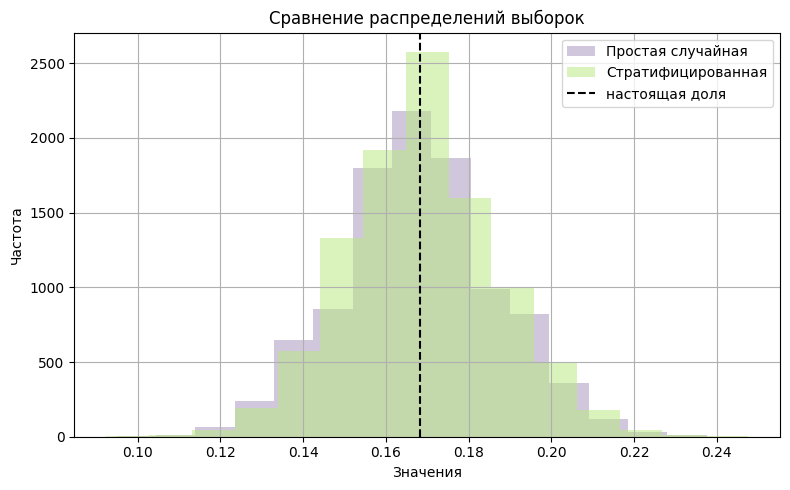

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(proportions, bins=15, alpha=0.5, label='Простая случайная', color='#a591ba')
plt.hist(stratified_samples, bins=15, alpha=0.5, label='Стратифицированная', color='#b6e97c')
plt.axvline(x=true_proportion, color='black', linestyle='dashed', linewidth=1.5, label='настоящая доля')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Сравнение распределений выборок')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Вывод: на графике видно, что стратифицированная выборка плотнее сосредоточена около среднего значения (уже и выше в центре). это значит, что значения в статифицированноц выборке менее "разбросаны" и более стабильны.